# Import packages

In [19]:
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from webdriver_manager.chrome import ChromeDriverManager
import lxml

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scrape the source codes

In [4]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('http://idojarasbudapest.hu/archivalt-idojaras')

time.sleep(5)

sourcesDictionary={}
years = ['2017', '2018', '2019', '2020', '2021', '2022']
months = ['Január', 'Február', 'Március', 'Április', 'Május', 'Június',
              'Július', 'Augusztus', 'Szeptember', 'Október', 'November', 'December']
for year in years:
    
    selectYear = Select(driver.find_element(By.ID, 'ev'))
    selectYear.select_by_visible_text(year)
    
    for month in months:     
        selectMonth = Select(driver.find_element(By.ID, 'ho'))
        selectMonth.select_by_visible_text(month)
        
        button = driver.find_element(By.ID, 'button')
        button.click()
        time.sleep(5)
        sourcesDictionary[year+month]=driver.page_source

C:\Users\Valter\AppData\Local\Temp/ipykernel_23220/3733909732.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


# Scrape the tables from the sources and put them into a pandas DataFrame

In [5]:
sourcesDictionary.keys()

dict_keys(['2017Január', '2017Február', '2017Március', '2017Április', '2017Május', '2017Június', '2017Július', '2017Augusztus', '2017Szeptember', '2017Október', '2017November', '2017December', '2018Január', '2018Február', '2018Március', '2018Április', '2018Május', '2018Június', '2018Július', '2018Augusztus', '2018Szeptember', '2018Október', '2018November', '2018December', '2019Január', '2019Február', '2019Március', '2019Április', '2019Május', '2019Június', '2019Július', '2019Augusztus', '2019Szeptember', '2019Október', '2019November', '2019December', '2020Január', '2020Február', '2020Március', '2020Április', '2020Május', '2020Június', '2020Július', '2020Augusztus', '2020Szeptember', '2020Október', '2020November', '2020December', '2021Január', '2021Február', '2021Március', '2021Április', '2021Május', '2021Június', '2021Július', '2021Augusztus', '2021Szeptember', '2021Október', '2021November', '2021December', '2022Január', '2022Február', '2022Március', '2022Április', '2022Május', '2022Jú

In [6]:
# soup = BeautifulSoup(sourcesDictionary['2017Február'])
# soup
# tempDf = pd.read_html(str(soup.find('table')))[0]
# tempDf

In [7]:
bpweatherdf = pd.DataFrame()
listOfMonthsNotToIncludeFor2017 = ['Január', 'Február', 'Március', 'Április', 'Május', 'Június']
for year in years:
    for month in months:
        if (year == '2017' and month in listOfMonthsNotToIncludeFor2017):
            continue
        if (year == '2022' and month == 'November'):
            break
        key = year+month
        soup = BeautifulSoup(sourcesDictionary[key]) # soup: html soup
        #soup
        tempDf = pd.read_html(str(soup.find('table')))[0]
        bpweatherdf = pd.concat([bpweatherdf, tempDf], axis=0, ignore_index=True)

In [8]:
bpweatherdf.head(10)

,Nap,Tmax [°C],Tmin [°C],Szél \t[m/s],Csapadék \t[mm]
0,2017.07.01szombat,26.0,15.0,6.1,14.0
1,2017.07.02vasárnap,25.0,15.0,6.9,0.0
2,2017.07.03hétfő,25.0,16.0,6.7,0.0
3,2017.07.04kedd,27.0,12.0,5.3,0.0
4,2017.07.05szerda,30.0,17.0,4.2,0.0
5,2017.07.06csütörtök,30.0,17.0,5.6,0.0
6,2017.07.07péntek,28.0,17.0,4.7,0.0
7,2017.07.08szombat,32.0,16.0,6.7,0.0
8,2017.07.09vasárnap,30.0,18.0,2.2,0.0
9,2017.07.10hétfő,36.0,20.0,6.4,21.0


In [9]:
bpweatherdf.rename(columns={'Nap': 'Date'}, inplace=True)
bpweatherdf.rename(columns={'Tmax  [°C]': 'Max temperature (°C)'}, inplace=True)
bpweatherdf.rename(columns={'Tmin  [°C]': 'Min temperature (°C)'}, inplace=True)
bpweatherdf.rename(columns={'Szél \t[m/s]': 'Wind (m/s)'}, inplace=True)
bpweatherdf.rename(columns={'Csapadék \t[mm]': 'Precipitation (mm)'}, inplace=True)

bpweatherdf['Date'] = bpweatherdf['Date'].apply(lambda x: x[0:10])

In [10]:
bpweatherdf.head(10)

,Date,Max temperature (°C),Min temperature (°C),Wind (m/s),Precipitation (mm)
0,2017.07.01,26.0,15.0,6.1,14.0
1,2017.07.02,25.0,15.0,6.9,0.0
2,2017.07.03,25.0,16.0,6.7,0.0
3,2017.07.04,27.0,12.0,5.3,0.0
4,2017.07.05,30.0,17.0,4.2,0.0
5,2017.07.06,30.0,17.0,5.6,0.0
6,2017.07.07,28.0,17.0,4.7,0.0
7,2017.07.08,32.0,16.0,6.7,0.0
8,2017.07.09,30.0,18.0,2.2,0.0
9,2017.07.10,36.0,20.0,6.4,21.0


In [11]:
bpweatherdf.to_csv('bp_weather_data.csv', index = False)

# Visualizations

## Max and min temperatures from July 2017 to October 2022

<AxesSubplot:>

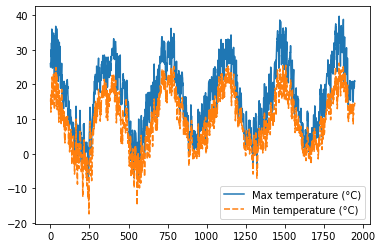

In [17]:
temperatures = bpweatherdf[['Date', 'Max temperature (°C)', 'Min temperature (°C)']]
sns.lineplot(data=temperatures)

## Wind speeds from July 2017 to October 2022

<AxesSubplot:xlabel='Date', ylabel='Wind (m/s)'>

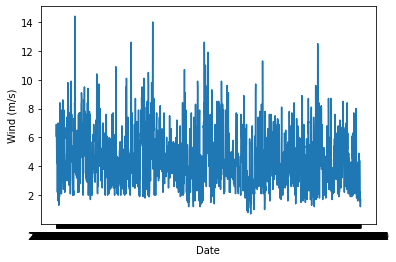

In [14]:
sns.lineplot(data=bpweatherdf, x='Date', y='Wind (m/s)')

## Precipitation from July 2017 to October 2022

<AxesSubplot:xlabel='Date', ylabel='Precipitation (mm)'>

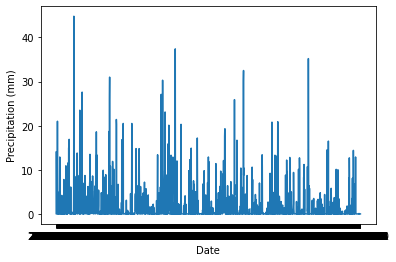

In [15]:
sns.lineplot(data=bpweatherdf, x='Date', y='Precipitation (mm)')

## Max and min temperatures in each year from July 2017 to October 2022

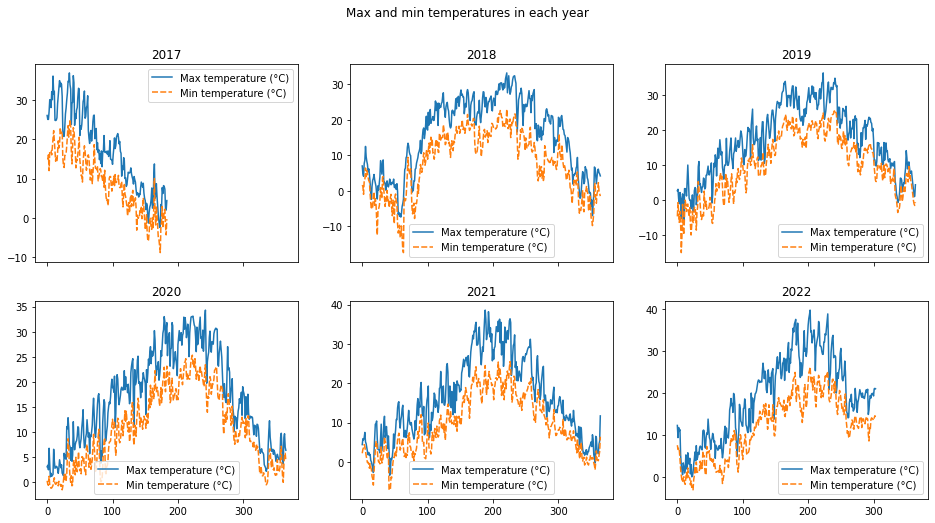

In [30]:
figure, axes = plt.subplots(2, 3, sharex=True, figsize=(16, 8))
figure.suptitle('Max and min temperatures in each year')

years = ['2017', '2018', '2019', '2020', '2021', '2022']
for year, ax in zip(years, np.ravel(axes)):
    ax.set_title(year)
    temperatures_in_year = temperatures[temperatures['Date'].str.startswith(year)].reset_index(drop=True)
    sns.lineplot(data=temperatures_in_year, ax=ax)